## <center> École Polytechnique de Montréal <br> Département Génie Informatique et Génie Logiciel <br>  INF8460 – Traitement automatique de la langue naturelle <br> </center>
## <center> TP4 - Les LLMs et la génération augmentée de récupération (RAG) pour les questions-réponses<br> Automne 2024 </center>


## Identification de l'équipe:

### Groupe de laboratoire:

### Equipe numéro :

### Membres:

- membre 1 (% de contribution, nature de la contribution)
- membre 2 (% de contribution, nature de la contribution)
- membre 3 (% de contribution, nature de la contribution)

* nature de la contribution: Décrivez brièvement ce qui a été fait par chaque membre de l’équipe. Tous les membres sont censés contribuer au développement. Bien que chaque membre puisse effectuer différentes tâches, vous devez vous efforcer d’obtenir une répartition égale du travail. Soyez précis ! N'indiquez pas seulement : travail réparti équitablement

## 1. Introduction

### 1.1. Description du TP4

Dans ce TP, vous allez travailler sur un système de **génération augmentée de récupération**, ou **RAG** (pour Retrieval Augmented Generation en anglais) qui combine des modèles de langue génératifs et de recherche d'information.

Étant donnée une question, il faudra retrouver les passages les plus pertinents  avec un modèle de recherche. Ensuite, il faudra générer une réponse à la question en utilisant ces passages de texte. Vous aurez finalement à trouver des manières d'améliorer les performances de votre modèle RAG.

L'ensemble est noté sur 100 points.

### Description des données

Les passages donnés sont des textes en anglais de quelques phrases sur divers sujets. Par exemple, les mathématiques, la physique, la chimie, la biologie l'informatique, la musique et la psychologie. En général, les textes abordent des sujets très spécifiques reliés à un domaine. Par exemple, il pourrait y avoir 1000 textes parlant d'informatique et 100 qui abordent, à leur manière, la notion de mémoire. Parmi ces 100 passages, 5 pourraient aborder la mémoire dans un processeur spécifique.

En ce qui concerne les questions, elles sont basées sur les sujets de certains textes précis et on peut y répondre à l'aide d'au moins un des textes. Dans certains cas, plusieurs textes sont nécessaires pour répondre à la question. Par exemple, plusieurs textes pourraient aborder le processeur Intel i7-13700k, mais la question pourrait nécessiter l'information de tous ces textes pour trouver la réponse.
Les questions ont été créées pour faire en sorte que les réponses soient assez courtes. Il peut s'agir d'un simple nombre ou de quelques mots (< 30 mots).


Vous trouverez ~ 13 000 passages dans le corpus pour ~ 1 700 paires de questions / réponses dans le jeu d'entraînement et ~ 500 dans le jeu de validation. Vous devez prédire 500 réponses aux questions du jeu de test.

### Exemple

Par exemple, pour la question

> What type of bonds are used to form branches in glycogen?

Avec l'approche RAG, plutôt que de générer la réponse directement, on va d'abord chercher dans un corpus de passages. Dans cet exemple, un des passages pertinents est :

> **Glycogen Structure and Function** : Glycogen is a molecular polymer of glucose used for energy storage. It is composed of linear chains of glucose molecules linked by α-1,4-glycosidic bonds, with branches formed off the chain via α-1,6-glycosidic bonds. The branches provide additional ""free ends"" for linear chains, allowing for faster glucose release.

Puis on génère une réponse conditionnée par les passages pertinents :

> α-1,6-glycosidic bonds

### Motivation

Le RAG est une approche très populaire en ce moment. Elle permet notamment d'avoir des sources qui supportent les réponses générées, ce qui peut être utile pour la vérification de faits ou pour contrôler les hallucinations. De plus, elle permet d'intégrer des connaissances externes et récentes dans les modèles de génération sans avoir à les ré-entraîner.

### Objectif du TP

Dans ce TP, vous implémenterez plusieurs systèmes de question-réponse. D'abord, vous testerez une approche de prompting qui n'utilise aucun passage pour aider le modèle de génération. Puis vous implémenterez un système figé qui utilise un modèle de plongements figé pour retrouver les $k$ passages les plus pertinents. Ces passages seront ensuite donnés à un modèle de génération figé aussi.

Enfin, vous implémenterez votre propre méthode dans l'objectif d'atteindre les meilleures performances dans la compétition Kaggle.

### Jeux de données

Vous avez 4 fichiers à votre disposition :
- 'rag_texts.csv' : le corpus de passages extraits de Wikipédia.
  - **id** : l'identifiant unique du passage.
  - **text** : le texte du passage.
- 'rag_questions_train.csv', 'rag_questions_val.csv' et 'rag_questions_test.csv' : les questions d'entraînement, de validation et de test.
  - **id** : l'identifiant unique de la question.
  - **question** : La question.
  - **text_id** (sauf pour le fichier de test) : la liste des identifiants des passages pertinents du corpus 'rag_texts.csv' pour la question.
  - **answer** (sauf pour le fichier de test) : la réponse à la question.

### Contraintes

- **Modèle génératif** : pour des raisons d'équité, le seul modèle de génération que vous pouvez utiliser est [microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct), disponible sur Hugging Face. Cette contrainte permet de mieux comparer les différentes approches et d'éviter que la performance soit uniquement due à un modèle de génération plus performant.
- Données externes : vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies.
- Modèles de plongements à utiliser: [BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)

### 1.2. Librairies permises

Vous pouvez utiliser les librairies suivantes
- Numpy
- Pandas
- HuggingFace
- nltk
- SpaCy
- PyTorch
- faiss
- Langchain
- re


- Pour toute autre librairie, demandez à votre chargé de laboratoire

### 1.3. Infrastructure

- Vous avez accès aux GPU du local L-4818. Dans ce cas, vous devez utiliser le dossier temp (voir le tutoriel VirtualEnv.pdf)
- Vous pouvez aussi utiliser l’environnement Google Colab :  https://colab.research.google.com/

### 1.4. Remise

### Échéance

Fin de la session. La date précise sera indiquée dans les boites de remise sur Moodle.


### Livrables

Vous devez remettre votre notebook sur Moodle et Gradescope en ipynb et pdf. Pour Gradescope vous devez associer les numéros de questions avec vos réponses dans le pdf grâce à l'outil que fournit Gradescope.


### Critères
1. Implantation correcte et efficace
2. Richesse de la solution proposée
3. Qualité du code (noms significatifs, structure, performance, gestion d’exception, etc.)
4. Commentaires clairs et informatifs
5. Aspect novateur
6. État de l'art synthétisé
7. Performance attendue des modèles
8. Réponses correctes/sensées aux questions de réflexion ou d'analyse

### CODE D’HONNEUR
- __Règle 1__:  Le plagiat de code est bien évidemment interdit. Toute utilisation de code doit être référencée adéquatement. L’utilisation de code ne peut concerner que les architectures de base (par exemple le Transformer). Vous __ne pouvez pas__ soumettre un code écrit par quelqu’un d’autre.
- __Règle 2__: Vous êtes libres de discuter des idées et des détails de mise en œuvre avec d'autres équipes. Cependant, vous ne pouvez en aucun cas consulter le code d'une autre équipe INF8460, ou incorporer leur code dans votre TP.
- __Règle 3__:  Vous ne pouvez pas partager votre code publiquement (par exemple, dans un dépôt GitHub public) tant que le cours n'est pas fini.


### 1.5. Kaggle

La compétion Kaggle sera accessible ici: https://www.kaggle.com/t/c970abbf273b4e13a642fce3bfe219be.

Vous devez recréer des équipes de 3 personnes sur Kaggle avec le même nom d'équipe que sur Moodle ainsi que les mêmes membres.

Le TP4 se fera sous forme d’une compétition Kaggle.  Vous devrez utiliser l’environnement Kaggle pour la soumission et l’évaluation de vos meilleurs modèles.  
Pour tester votre modèle au fur et à mesure, vous aurez le droit à 4 soumissions par jour sur Kaggle. Il y aura deux types de résultats : votre « private leaderboard » et votre « public leaderboard » :
- Le « public leaderboard » est calculé sur approximativement 30% des données de test, choisies aléatoirement par Kaggle. Ce score est public et est calculé sur la même tranche de données pour tous les participants.
- Le « private leaderboard » est calculé sur approximativement 70% des données de test et n’est visible qu’à la fin de la compétition. Le résultat final sera basé sur ce leaderboard. Si aucune soumission n’est choisie, la soumission avec le meilleur score sur le « public leaderboard » sera utilisée pour calculer le score sur le « private leaderboard ».

Pour l’évaluation, vous devrez soumettre un fichier de données _tp4_submission.csv_ du même format que le fichier _sample_submission.csv_ (disponible sur le site de la compétition et Moodle).


### 1.6. Description des données et métriques d’évaluation

Dans votre fichier de soumission, il doit y avoir une colonne _id_ et une colonne _answer_. La colonne _id_ doit correspondre à l'identifiant unique de la question et la colonne _answer_ doit correspondre à la réponse générée par votre modèle.

Nous utiliserons la métrique **BLEU**, vue en cours, pour évaluer les réponses générées par rapport au jeu de référence (gold standard).

In [1]:
!pip install faiss-gpu
!pip install datasets peft
!pip install -q 'bitsandbytes>=0.41.1' 'transformers>=4.37.0' 'accelerate>=0.25.0'
!pip install -q torch --upgrade
!pip install -U bitsandbytes
!pip install evaluate
!pip install trl
!pip install rank_bm25

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.5/85.5 MB 26.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.4/122.4 MB 17.7 MB/s eta 0:00:00


In [2]:
# Import des librairies

import os
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
from typing import Optional
from transformers import AutoTokenizer, AutoModel, AutoModelForCausalLM, pipeline, BitsAndBytesConfig, TrainingArguments
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import datasets
from datasets import load_dataset
from transformers import AutoModelForCausalLM, AutoTokenizer
from nltk.translate.bleu_score import sentence_bleu
import nltk
import faiss

from peft import LoraConfig
from trl import SFTTrainer


In [ ]:
# Si vous stockez vos données sur Google Drive

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
root_path = './'
data_path = root_path + 'data/'

## 2. Analyse exploratoire et modèle de génération simple (15 points)

Pour commencer ce TP, et pour fixer des modèles de base (baselines), vous allez utiliser un modèle de génération simple pour répondre aux questions. Vous utiliserez le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'** disponible sur Hugging Face. Dans cette partie, vous devez simplement générer des réponses aux questions de l'ensemble de validation (_questions_val.csv_) sans utiliser de passages pour aider le modèle.

### 2.1. Chargement des données (5 points)

#### 2.1.1 Taille des données (1 point)

Affichez la taille de tous les jeux de données et quelques questions de l'ensemble d'entraînement

In [4]:
questionTrain   = pd.read_csv(data_path + "questions_train.csv")
questionTest    = pd.read_csv(data_path + "questions_test.csv")
questionVal     = pd.read_csv(data_path + "questions_val.csv")
texts           = pd.read_csv(data_path + "texts.csv")
print(f'{"":<10} | {"QTrain":^10} | {"QTest":^10} | {"QVal":^10} | {"Text":^10} |')
print("="*64)
print(f'{"Taille":<10} | {len(questionTrain):^10} | {len(questionTest):^10} | {len(questionVal):^10} | {len(texts):^10} | ')
print("="*64)

# Initial keys :
questionTrain   = questionTrain.drop(["Unnamed: 0", "Unnamed: 0.1"],axis = 1)
questionTest    = questionTest.drop (["Unnamed: 0"],axis = 1)
questionVal     = questionVal.drop  (["Unnamed: 0.1", "Unnamed: 0"], axis = 1)
texts           = texts.drop        (["Unnamed: 0"], axis = 1)


questionTrainKeys   = list(questionTrain.keys() )
questionTestKeys    = list(questionTest.keys()  )
questionValKeys     = list(questionVal.keys()   )
textsKeys           = list(texts.keys()         )

print(f'{"Colonnes":<10} | {questionTrainKeys[0]:^10} | {questionTestKeys[0]:^10} | {questionValKeys[0]:^10} | {textsKeys[0]:^10} | ')
print(f'{""        :<10} | {questionTrainKeys[1]:^10} | {questionTestKeys[1]:^10} | {questionValKeys[1]:^10} | {textsKeys[1]:^10} | ')
print(f'{""        :<10} | {questionTrainKeys[2]:^10} | {""                 :^10} | {questionValKeys[2]:^10} | {""          :^10} | ')
print(f'{""        :<10} | {questionTrainKeys[3]:^10} | {""                 :^10} | {questionValKeys[3]:^10} | {""          :^10} | ')


           |   QTrain   |   QTest    |    QVal    |    Text    |
Taille     |    1747    |    500     |    500     |   13314    | 
Colonnes   |     id     |     id     |     id     |     id     | 
           |  text_ids  |  question  |  text_ids  |    text    | 
           |  question  |            |  question  |            | 
           |   answer   |            |   answer   |            | 


#### 2.1.2 Analyse exploratoire (4 points)

a) Sur l'ensemble d'entraînement, affichez :
- Le nombre moyen de mots dans une question
- Le nombre moyen de mots dans une réponse
- Le nombre moyen de passages nécessaires pour répondre à une question
- Le nombre minimal de passages nécessaires pour répondre à une question
- Le nombre maximal de passages nécessaires pour répondre à une question


In [5]:
# TODO
question_words = []
answer_words = []
len_text_ids = []

for index, row in questionVal.iterrows():
    question_words.append(len(row['question'].split()))
    answer_words.append(len(row['answer'].split()))
    len_text_ids.append(len(row['text_ids']))

print('Nombre moyen de mots dans une question : ', np.mean(question_words))
print('Nombre moyen de mots dans une reponse : ', np.mean(answer_words))
print('Nombre moyen de passage necessaire pour repondre a une question : ', np.mean(len_text_ids))
print('Nombre minimal de passages necessaires pour repondre a une question : ', np.min(len_text_ids))
print('Nombre maximal de passages necessaires pour repondre a une question : ', np.max(len_text_ids))
# END TODO

Nombre moyen de mots dans une question :  10.594
Nombre moyen de mots dans une reponse :  5.988
Nombre moyen de passage necessaire pour repondre a une question :  15.622
Nombre minimal de passages necessaires pour repondre a une question :  9
Nombre maximal de passages necessaires pour repondre a une question :  24


b) De plus, affichez des histogrammes décrivant la distribution du nombre de mots des questions, des réponses et des textes. Utilisez des bacs (bins) de 50. Commentez vos résultats.

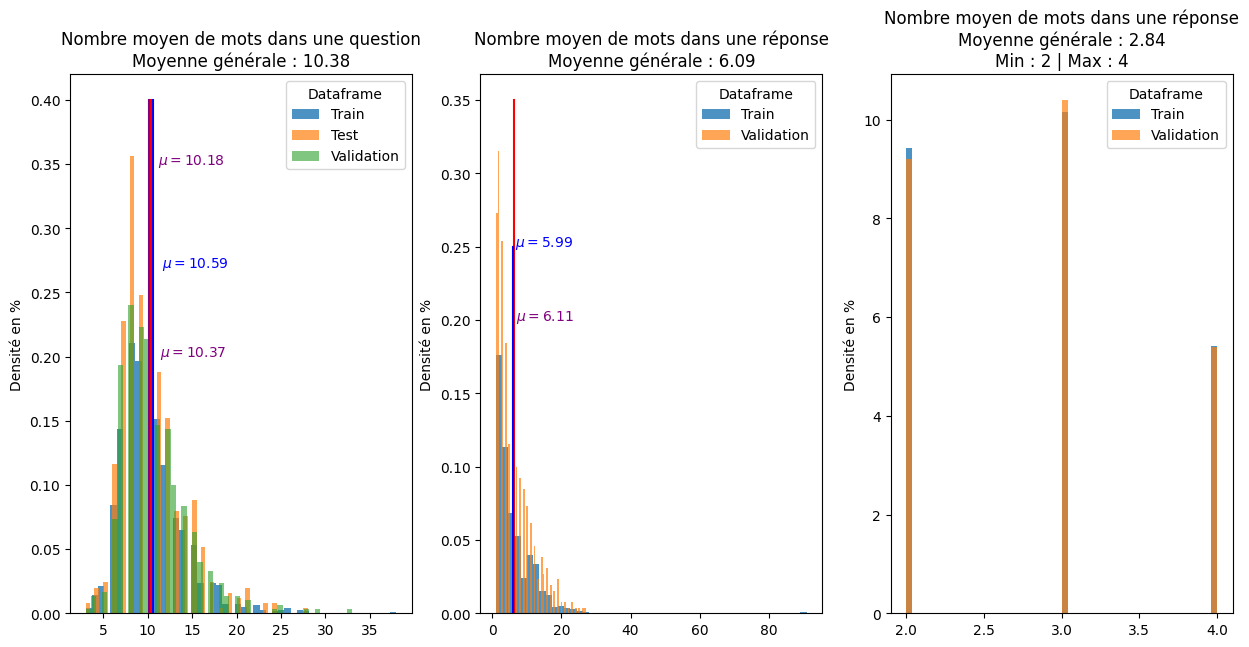

In [6]:
def getNWords(sentence):
    return len(sentence.split(' '))

def getNIds(listOfIds):
    return len(listOfIds.replace("[",'').replace("]",'').split(' '))

fig,axes = plt.subplots(1,3)
fig.set_size_inches(15,7)
axes = axes.ravel()

#================ Number of words per question ================
lensTrain = list(questionTrain["question"].apply(getNWords))
lensTrainMean = np.mean(lensTrain)
axes[0].hist(lensTrain,
             bins = 50, density = True,
             label = "Train", alpha = .8)
axes[0].plot([lensTrainMean,lensTrainMean],[0,0.4], color = "red")
axes[0].text(lensTrainMean * 1.1,0.2, f'$\\mu = ${lensTrainMean:.2f}',color = "purple")

lensTest = list(questionTest["question"].apply(getNWords))
lensTestMean = np.mean(lensTest)
axes[0].hist(lensTest,
             bins = 50, density = True,
             label = "Test", alpha = .7)
axes[0].plot([lensTestMean,lensTestMean],[0,0.4], color = "purple")
axes[0].text(lensTestMean * 1.1,0.35, f'$\\mu = ${lensTestMean:.2f}',color = "purple")

lensVal = list(questionVal["question"].apply(getNWords))
lensValMean = np.mean(lensVal)
axes[0].hist(lensVal,
             bins = 50, density = True,
             label = "Validation", alpha = .6)
axes[0].legend(title = "Dataframe")
axes[0].plot([lensValMean,lensValMean],[0,0.4], color = "blue")
axes[0].text(lensValMean * 1.1,0.27, f'$\\mu = ${lensValMean:.2f}',color = "blue")
allLens = lensTrain + lensTest + lensVal
axes[0].set_title(f'Nombre moyen de mots dans une question\nMoyenne générale : {np.mean(allLens):.2f}')
axes[0].set_ylabel("Densité en %")

#================ Number of words per answer ================
lensTrain = list(questionTrain["answer"].apply(getNWords))
lensTrainMean = np.mean(lensTrain)
axes[1].hist(lensTrain,
             bins = 50, density = True,
             label = "Train", alpha = .8)
axes[1].plot([lensTrainMean,lensTrainMean],[0,0.35], color = "red")
axes[1].text(lensTrainMean * 1.1,0.2, f'$\\mu = ${lensTrainMean:.2f}',color = "purple")


lensVal = list(questionVal["answer"].apply(getNWords))
lensValMean = np.mean(lensVal)
axes[1].hist(lensVal,
             bins = 50, density = True,
             label = "Validation", alpha = .7)
axes[1].legend(title = "Dataframe")
axes[1].plot([lensValMean,lensValMean],[0,0.25], color = "blue")
axes[1].text(lensValMean * 1.1,0.25, f'$\\mu = ${lensValMean:.2f}',color = "blue")
allLens = lensTrain + lensVal
axes[1].set_title(f'Nombre moyen de mots dans une réponse\nMoyenne générale : {np.mean(allLens):.2f}')
axes[1].set_ylabel("Densité en %")

#================ Number of Ids per answer ================
lensTrain = list(questionTrain["text_ids"].apply(getNIds))
lensTrainMean = np.mean(lensTrain)
axes[2].hist(lensTrain,
             bins = 50, density = True,
             label = "Train", alpha = .8)


lensVal = list(questionVal["text_ids"].apply(getNIds))
lensValMean = np.mean(lensVal)
axes[2].hist(lensVal,
             bins = 50, density = True,
             label = "Validation", alpha = .7)
axes[2].legend(title = "Dataframe")
axes[2].set_ylabel("Densité en %")

allLens = lensTrain + lensVal
axes[2].set_title(f'Nombre moyen de mots dans une réponse\nMoyenne générale : {np.mean(allLens):.2f}\nMin : {min(allLens)} | Max : {max(allLens)}')

plt.show()
del allLens, lensTest, lensTrain, lensVal, lensTestMean, lensTrainMean, lensValMean


COMMENTAIRE:

### 2.2. Chargement du modèle et génération des réponses (5 points)

Nous allons maintenant évaluer la performance d'un modèle de langue à répondre aux questions de l'ensemble de validation. Chargez d'abord le modèle **'microsoft/Phi-3-mini-128k-instruct'** avec la librairie `transformers` de huggingface et générez les réponses du modèle à partir de la question. Générez au maximum 32 nouveaux jetons.

In [7]:
# TODO
model_id = "microsoft/Phi-3-mini-128k-instruct"

bnb_config = BitsAndBytesConfig(
load_in_8bit=True,
torch_dtype=torch.bfloat16,
llm_int8_enable_fp32_cpu_offload=True
)

model_kwargs = dict(
    use_cache=False,
    trust_remote_code=True,
    device_map="auto",
    quantization_config=bnb_config,
)

model = AutoModelForCausalLM.from_pretrained(model_id, **model_kwargs)

tokenizer = AutoTokenizer.from_pretrained(model_id)
# END TODO

Unused kwargs: ['torch_dtype']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.48k [00:00<?, ?B/s]

configuration_phi3.py:   0%|          | 0.00/11.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- configuration_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


modeling_phi3.py:   0%|          | 0.00/73.2k [00:00<?, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/microsoft/Phi-3-mini-128k-instruct:
- modeling_phi3.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/181 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.44k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.94M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/306 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/599 [00:00<?, ?B/s]

In [ ]:
from tqdm import tqdm
from random import randint

def generateAnswersSimple(df : pd.DataFrame, model, BATCH_SIZE = 32, qLabel = "question") -> pd.DataFrame:
  """
  Generate answers from a datafraim with the key "question" and "id"
  Returns a dataframe with the keys ("id", "question", "answer")
  """
  DEVICE = model.device

  # Initialise the answer and question lists
  answers = []
  questions = df[qLabel].to_list()
  nQuestions = len(questions)

  for i in tqdm(
      range(0, nQuestions, BATCH_SIZE)
      ):

      # Select the questions for the batch
      batch_questions = questions[i:i + BATCH_SIZE]


      # Encode the questions
      encode = tokenizer(
          batch_questions,
          return_tensors      = "pt",
          add_special_tokens  = False,
          padding             = True,
          truncation          = True
          ).to(DEVICE)

      # Generate the answer
      generation_args = model.generate(
          **encode,
          max_new_tokens  = 32,
          do_sample       = False,
          temperature     = 0.0
          )

      # Decode the answer and save it in the answer list
      input_lengths = encode['input_ids'].shape[1]

      decoded = tokenizer.batch_decode(
          generation_args[:, input_lengths:],
          skip_special_tokens = True,
          return_full_text    = False)    # List of strings
      answers.extend(decoded)

      # Empty the cache
      torch.cuda.empty_cache()

  ## Prepare the output :
  output = pd.DataFrame({
      "id"        : df["id"].tolist(),
      "question"  : df[qLabel].tolist(),
      "answer"    : answers
  })
  return output

In [ ]:
def generateAnswersWithSimplePrompt(df : pd.DataFrame, model, BATCH_SIZE = 32) -> pd.DataFrame:
  """
  Generate answers from a datafraim with the key "question" and "id"
  Returns a dataframe with the keys ("id", "question", "answer")
  Approch more similar from the documentation of the phi3 model
  """
  DEVICE = model.device

  # Initialise the answer and question lists
  answers = []
  questions = df['question'].to_list()
  nQuestions = len(questions)


  for i in tqdm(
      range(0, nQuestions, BATCH_SIZE)
      ):

      # Select the questions for the batch
      batch_questions = questions[i:i + BATCH_SIZE]

      #----------------------------------------------
      # Create simple prompt
      batchPrompts = []
      for q in batch_questions:
          batchPrompts.append(f"Instruct: {q}\nAnswer:")
      #------------------------------------------------

      # Encode the questions
      encode = tokenizer(
          batchPrompts,
          return_tensors      = "pt",
          add_special_tokens  = False,
          padding             = True,
          truncation          = True
          ).to(DEVICE)

      # Generate the answer
      generation_args = model.generate(
          **encode,
          max_new_tokens  = 32,
          do_sample       = False,
          temperature     = 0.0
          )                       # tensor of size (BATCH-SIZE x 57) (?) Pk ?

      # Decode the answer and save it in the answer list
      input_lengths = encode['input_ids'].shape[1]

      decoded = tokenizer.batch_decode(
          generation_args[:, input_lengths:],
          skip_special_tokens = True,
          return_full_text    = False)    # List of strings
      answers.extend(decoded)

      # Empty the cache
      torch.cuda.empty_cache()

  ## Prepare the output :
  output = pd.DataFrame({
      "id"        : df["id"].tolist(),
      "question"  : df["question"].tolist(),
      "answer"    : answers
  })
  return output




In [ ]:
predictionVal = generateAnswersSimple(questionVal, model)
#predictionValSimplePrompt = generateAnswersWithSimplePrompt(questionVal, model)
predictionVal.head()

  0%|          | 0/16 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache classes. Use `get_max_cache_shape()` instead. Calling `get_max_cache()` will raise error from v4.48
100%|██████████| 16/16 [00:33<00:00,  2.07s/it]


,id,question,answer
0,780,What is the effect of the M201V variant of CYS...,"\n\n# Answer\nThe M201V variant of CYSLTR2, wh..."
1,1870,What is the key difference in the structure of...,\n\nA. Carbapenems have a different side chain...
2,654,What type of facets are there in the 8-demicub...,\n\nA) 8-demicubes and 8-orthoplexes\nB) 8-dem...
3,2538,What is the legal status of 5F-AMB in the Unit...,\n A) It is a Schedule I controlled substanc...
4,745,What is converted into estrone sulfamate by 17...,\n\nA. Estradiol\nB. Estrone\nC. Estriol\nD. A...


### 2.3. Évaluation des réponses (3 points)

Complétez la fonction `evaluate_bleu` et utilisez la métrique BLEU pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation. Évaluez votre modèle avec les métriques BLEU-1 et BLEU-2. BLEU-1 ne considère que les unigrammes pour évaluer la réponse et BLEU-2 considère les bigrammes aussi. Pour séparer une séquence en mots, vous pouvez simplement utiliser la fonction `split()`.

In [8]:
def evaluate_bleu(df_true: pd.DataFrame, df_pred: pd.DataFrame, bleu_type: int):
    """
    Évalue les réponses générées en utilisant la métrique BLEU.

    Paramètres:
    df_true (pd.DataFrame): DataFrame contenant les vraies réponses avec des colonnes 'id' et 'answer'.
    df_pred (pd.DataFrame): DataFrame contenant les réponses prédites avec des colonnes 'id' et 'answer'.
    bleu_type (int): Nombre (soit 1 ou 2) correspondant aux n-grammes considérés pour la métrique (bleu_type = 1 : BLEU-1, bleu_type = 2 : BLEU-2)

    Retourne:
    float: Score BLEU moyen sur toutes les entrées.
    """
    weights = (1,0,0,0) if bleu_type == 1 else (0.5,0.5,0,0)

    # initialise a list to calculate the mean in the end
    bleu_scores = []

    # Looping through the question / answer
    for index, row in df_pred.iterrows():
        # select the prediction
        hypothesis = row["answer"].split()

        # select the true one
        reference = df_true.iloc[index]["answer"].split()

        # Evaluate the bleu score for the sentence
        bleu = sentence_bleu(references=[reference], hypothesis = hypothesis, weights = weights)
        bleu_scores.append(bleu)

    # Return the mean of the scores
    return np.mean(bleu_scores)

In [ ]:

bleu1Val = evaluate_bleu(questionVal, predictionVal, bleu_type=1)
bleu2Val = evaluate_bleu(questionVal, predictionVal, bleu_type=2)

#bleu1ValSimplePrompt = evaluate_bleu(questionVal, predictionValSimplePrompt, bleu_type=1)
#bleu2ValSimplePrompt = evaluate_bleu(questionVal, predictionValSimplePrompt, bleu_type=2)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

In [ ]:
prec = 1e3
print(f"{'':^10} | {'Train':^15} | {'Validation':^15}")
print("-" * 45, "Sans prompt")
print(f"{'BLEU-1':^10} | {str(int(bleu1Val * prec) / prec):^15}")
print(f"{'BLEU-2':^10} |  {str(int(bleu2Val * prec) / prec):^15}")
# print("-" * 45, "Avec prompt simple")
# print(f"{'BLEU-1':^10} | {str(int(bleu1TrainSimplePrompt * prec) / prec):^15} | {str(int(bleu1ValSimplePrompt * prec) / prec):^15}")
# print(f"{'BLEU-2':^10} | {str(int(bleu2TrainSimplePrompt * prec) / prec):^15} | {str(int(bleu2ValSimplePrompt * prec) / prec):^15}")

           |      Train      |   Validation   
--------------------------------------------- Sans prompt
  BLEU-1   |      0.08      
  BLEU-2   |       0.03      


### 2.4. Commentaire (2 points)

Reportez, puis commentez la performance obtenue ici.

Performance obtenue:

## 3. Approche RAG figé (45 points)

Dans cette partie, vous allez implémenter une approche simple de RAG figé. On dit ici que le modèle est figé car on ne ré-entraîne aucun modèle. Vous implémenterez deux variantes : avec ou sans l'utilisation d'un algorithme d'indexation.

Dans la méthode d'implémentation du RAG figé, vous allez d'abord retrouver les passages pertinents pour chaque question avec un modèle de plongements de type Transformers, puis générer une réponse conditionnée par ces passages.

Dans cette partie, on utilisera
- le modèle de plongements (embedding-model) **[BAAI/bge-small-en-v1.5](https://huggingface.co/BAAI/bge-small-en-v1.5)** pour obtenir les vecteur de plongements des questions et des passages
- le modèle de génération (generative-model) **[microsoft/Phi-3-mini-128k-instruct](https://huggingface.co/microsoft/Phi-3-mini-128k-instruct)** pour générer les réponses

### 3.1 RAG figé sans indexation (23 points)

#### 3.1.1 Passages pertinents (8 points)

Pour retrouver les passages pertinents, vous devez d'abord encoder les questions et les passages avec le modèle de plongements. Puis, vous devez calculer la similarité cosinus entre les questions et les passages pour retrouver les $k$ passages les plus pertinents pour chaque question.

In [9]:
# TODO
# Name of the embedding model
bge_id = 'BAAI/bge-small-en-v1.5'

# Load the embeddings and paired tokenizer
bge_model = AutoModel.from_pretrained(bge_id)
bge_tokenizer = AutoTokenizer.from_pretrained(bge_id)

# Set parameters
BATCH_SIZE = 32
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# END TODO

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/133M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

In [10]:
def encode_sequences(sequences: list, tokenizer, model, device = DEVICE, batch_size = BATCH_SIZE):
    """
    Encode les textes en utilisant le modèle passé en paramètre pour générer les plongements des textes

    Paramètres:
    sequences    : Liste de séquence à transformer en plongements
    tokenizer   : Segmenteur du modèle de plongements
    model       : Modèle de plongements
    device      : Machine sur laquelle les opérations doivent être effectuées
    batch_size  : Taille des lots lors de la génération des traitements
    """

    # Put the model on the selected device
    model = model.to(DEVICE)

    # Set it to evaluation mode
    model.eval()

    # Initialise an embedding matrix that will hold the oncomming embeddings
    embeddings = torch.empty(
        (0,model.config.hidden_size),   # size(???)
        dtype=torch.float32
        ).to(DEVICE)                    # put it on the selected device


    # Looping through the sequence
    for i in range(0, len(sequences), BATCH_SIZE):
        # Select the batch
        batch_sequence = sequences[i:BATCH_SIZE+i]

        # Encode the sequence
        encoded_input = tokenizer(
            batch_sequence,
            padding         = True,
            truncation      = True,
            return_tensors  = 'pt'
            ).to(DEVICE)

        with torch.no_grad():
            # Generate the embedding
            model_output = model(**encoded_input)
            batch_embeddings = model_output[0][:, 0]

        # Save the embedding in the embeddings variable
        batch_embeddings = torch.nn.functional.normalize(
            batch_embeddings,
            p   = 2,
            dim = 1
            ).to(DEVICE)

        embeddings = torch.cat((embeddings, batch_embeddings),0)

    # return the embeddings
    return  embeddings #torch.Tensor

In [11]:
# TODO
sequences = texts["text"].to_list()
print('total sequences : ', len(sequences))

# create the embeddings for the texts
text_embeds = encode_sequences(sequences, bge_tokenizer, bge_model, DEVICE, BATCH_SIZE)
print("text_embeds.shape : ", text_embeds.shape)
# END TODO

total sequences :  13314
text_embeds.shape :  torch.Size([13314, 384])


#### 3.1.2 Évaluation des passages retrouvés avec Recall@k et precision@k (7 points)

Maintenant que les passages ont tous été encodés, on peut évaluer si les passages retrouvés sont pertinents. En prenant les $k$ premiers passages, on peut évaluer si on retrouve les bons passages associés aux questions. C'est un des avantages du système RAG : on peut évaluer de façon indépendante la qualité du système qui retrouve les passages pertinents et de celui qui génère les réponses. Cela permet notamment d'évaluer quels sont les points forts et points faibles du système.

Pour cela, vous allez utiliser les métriques **Precision@k** et **Recall@k** définies dans les équations suivantes. Implémentez ces métriques.

$$\text{Precision@k} = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{k}$$

$$\text{Recall@k} (Rappel@k) = \frac{\text{Nombre d'éléments pertinents dans les k premiers}}{\text{Nombre total d'éléments pertinents}}$$


In [12]:
def compute_recall_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Recall@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne:
    Recall moyen
    """
    # Initialise recalls list so we can return the mean
    all_recalls = []

    # looping through the questions
    for ref_truth, ref_pred in zip(ground_truth, predictions):

        k_relevant_passages = 0
        #Count number of same references between ground_truth and predictions
        for passage in set(ref_pred):
            if passage in set(ref_truth):
                k_relevant_passages += 1

        # save the recall
        recall = k_relevant_passages/len(set(ref_truth))
        all_recalls.append(recall)

    # return the mean recall
    return np.mean(all_recalls)

In [13]:
def compute_precision_at_k(ground_truth, predictions):
    """
    Calcule la métrique du "Precision@k". On assume que predictions contiennent le bon nombre de passages (=k)

    Paramètres:
    ground_truth : Liste contenant tous les vrais passages associés aux questions (ex : [[1, 2, 3], [4, 5, 6]] si les passages de la question 1 sont [1, 2, 3] et
    les passages de la question 2 sont [4, 5, 6])
    predictions : Liste contenant tous les passages retrouvés pour chacune des questions formattée de la même manière que `ground_truth`

    Retourne:
    Précision moyenne
    """
    # Initialise the precision list so we can return the mean
    all_precisions = []

    # Looping through the questions
    for ref_truth, ref_pred in zip(ground_truth, predictions):

        k_relevant_passages = 0
        #Count number of same references between ground_truth and predictions
        for passage in set(ref_pred):
            if passage in set(ref_truth):
                k_relevant_passages += 1

        # Save the precision
        precision = k_relevant_passages/len(set(ref_pred))

        all_precisions.append(precision)

    # Return the mean precision
    return np.mean(all_precisions)


#### 3.1.3 Résultat d'évaluation (5 points)
Implémentez la fonction _'retrieve_passages'_ qui retourne les indices des $k$ passages les plus similaires pour une question. Utilisez la similarité cosinus pour comparer les passages et les questions. Évaluez ensuite votre modèle récupérant les passages avec les métriques Precision@k et Recall@k sur le jeu de validation. Calculez avec $k={1, 2, 3, 4, 5}$.

In [14]:
def retrieve_passages(questions: list, passage_embed: torch.Tensor, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    passage_embed   : Tenseur contenant les plongements de chaque passage (n, dim)
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """
    # initialise the k_passages list
    # the list will hold lists of the k most similar texts for a given question
    k_passages = []

    cos = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

    # Loop through the questions
    for question in questions:

        # Encode the question
        encoded_input = embedding_model_tokenizer(
            question,
            padding         = True,
            truncation      = True,
            return_tensors  = 'pt'
            ).to(DEVICE)

        # Create the embedding of the question
        with torch.no_grad():
            model_output = embedding_model(**encoded_input)
            question_embed = model_output[0][:, 0]

        # normalise it
        question_embed = torch.nn.functional.normalize(
            question_embed,
            p   = 2,
            dim = 1
            ).to(DEVICE)

        # Evaluate the similarity between the texts and the question
        cosine_sim = cos(passage_embed[:,:], question_embed)

        # save the top k
        topk = torch.topk(cosine_sim, k)
        k_passages.append(topk.indices.cpu().numpy())

    return k_passages


In [15]:
# TODO
# Create a dictionnary holding the matrices (question id x k).
# The matrices : each line represent a question

k_passages = {}
questions = questionVal["question"].to_list()
for k in [1,2,3,4,5]:
    k_passages[k] = retrieve_passages(questions, text_embeds, k, bge_tokenizer, bge_model)

# END TODO

#### 3.1.4 Graphique (3 points)
Affichez maintenant un graphique de vos résultats de la question précédente en mettant à l'axe des x la valeur de $k$ et à l'axe des y la valeur de la précision et du rappel. Quel est le nombre optimal de passages à passer au modèle en vous basant sur le recall@k et precision@k ? Pourquoi ?

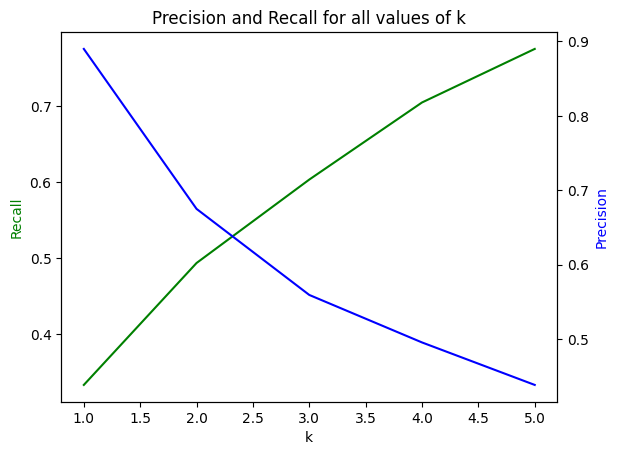

In [16]:
def convert_string_list_to_int_list(text_ids):
    """
    Convert the string list of text_ids found in the dataframe into a list of int
    """
    text_ids = text_ids.strip('[').strip(']').split()
    return [int(x) for x in text_ids]

# int list of text_ids from validation dataset
ground_truth_ids = questionVal["text_ids"].apply(
    lambda x : convert_string_list_to_int_list(x)
    ).to_list()

recall = []
precision = []

# Calculates precision and recall for all values of k
for key, value in k_passages.items():
    recall.append(compute_recall_at_k(ground_truth_ids, k_passages[key]))
    precision.append(compute_precision_at_k(ground_truth_ids, k_passages[key]))

all_k = list(k_passages.keys())

# Display plot
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(all_k, recall, 'g-')
ax2.plot(all_k, precision, 'b-')

ax1.set_xlabel('k')
ax1.set_ylabel('Recall', color='g')
ax2.set_ylabel('Precision', color='b')

plt.title("Precision and Recall for all values of k")
plt.show()

### 3.2 RAG figé avec FAISS (14 points)

Maintenant on vous demande d'utiliser FAISS pour l'indexation des plongements des passages.

[FAISS (Facebook AI Similarity Search)](https://ai.meta.com/tools/faiss/) est une bibliothèque open-source développée par Meta pour la recherche de similarité rapide sur des vecteurs denses, comme des embeddings de textes ou d'images. Elle est optimisée pour gérer de grands volumes de données en haute dimension et peut être accélérée avec des GPU. FAISS est largement utilisée pour des systèmes de recommandation ou la recherche d'information à grande échelle. Pour plus de détails, veuillez consulter  [le tutoriel sur Moodle](https://moodle.polymtl.ca/course/view.php?id=2813).


#### 3.2.1 Initialisez l'indexation FAISS avec les plongements des passages (2 points)

Utilisez les plongements des passages générés au niveau de la question 3.1.1 et indexez-les avec FAISS. Vérifiez que le nombre de plongements dans l'objet FAISS est bien le même que le nombre de passages. N'oubliez pas qu'on veut une indexation basée sur la similarité cosinus.

In [ ]:
# The structure is always the same using faiss :
# - initialise the index object (giving the corpus of reference)
# - embed the query
# - Search lowest similarity between the query and the corpus

vector_dimensions = text_embeds.shape[1]

# IndexFlatL2 because of the argument in retrieve_passage_faiss
# Otherwise would have picked InflexFlatIP which does cosine based on the doc.
index = faiss.IndexFlatL2(vector_dimensions)

# No need to normalize because we already do it before
index.add(text_embeds.cpu().numpy())

print('nombre de passages : ', index.ntotal)

nombre de passages :  13314
nombre de passages :  13314


#### 3.2.2 Récupération des passages avec FAISS (4 points)

Implémentez la fonction _'retrieve_passages_faiss'_ qui retourne les indices des $k$ passages les plus similaires pour une question à l'aide d'un indexation FAISS


In [ ]:
def retrieve_passages_faiss(questions: list, vector_index: faiss.IndexFlatL2, k: int, embedding_model_tokenizer, embedding_model):
    """
    Retourne les k passages les plus pertinents pour chaque question passée en paramètre

    Paramètres:
    questions       : Les questions pour lesquelles on cherche les passages les plus pertinents
    vector_index    : L'objet d'indexation FAISS
    k               : le nombre de passages à retourner
    tokenizer       : Segmenteur du modèle de plongements
    model           : Modèle de plongements

    Retourne:
    Les indices des k passages les plus pertinents pour la question
    """

    id_array = []
    for question in questions:
        # Encode the query
        encoded_input = embedding_model_tokenizer(question, padding=True, truncation=True, return_tensors='pt')
        encoded_input = encoded_input.to(DEVICE)

        # Embed the query
        with torch.no_grad():
            model_output = embedding_model(**encoded_input)
            question_embed = model_output[0][:, 0]

        # normalize the query
        question_embed = torch.nn.functional.normalize(
            question_embed,
            p   = 2,
            dim = 1
            ).to(DEVICE)

        # Converts to a numpy array
        new_vector = question_embed.cpu().numpy()

        # Proceed to the search
        _, ann = vector_index.search(new_vector, k)

        # Save the indexes
        id_array.append(ann)

    return id_array



#### 3.2.3 Exécution de FAISS (4 points)

Exécutez maintenant la fonction _"retrieve_passages_faiss"_ pour récupérer les bons passages pour les questions du jeu de validation avec votre k optimal.

In [ ]:
# TODO
# Proceed to the search with the faiss function
k_opt = 3 # evaluated based on the previous graph
questions = questionVal["question"].to_list()
idFaissSearch = retrieve_passages_faiss(questions, index, k_opt, bge_tokenizer, bge_model)
idFaissSearch = np.squeeze(idFaissSearch, axis=1)
# END TODO


#### 3.2.4 Calculez les métriques Precision@K et Rappel@K pour les passages retrouvés avec FAISS avec votre k optimal (2 points)

In [ ]:
# TODO
# Evaluate precision and recall for the validation dataset
# ground_truth_ids defined in 3.1.4
precision_faiss = compute_precision_at_k(ground_truth_ids, idFaissSearch)
recall_faiss = compute_recall_at_k(ground_truth_ids, idFaissSearch)

print(f'{"Precision avec faiss et k optimal":<40} : ', precision_faiss)
print(f'{"Recall avec faiss et k optimal":<40} : ', recall_faiss)
# END TODO

Precision avec faiss et k optimal        :  0.5593333333333333
Recall avec faiss et k optimal           :  0.6031666666666666


#### 3.2.5 Quelle remarque pouvez-vous faire sur l'utilisation de FAISS en termes de passages retrouvés, de temps d'exécution et de tout autre élément qui vous semble approprié ? (2 points)

> Réponse Temps d'exécution beaucoup plus rapide (AJOUTER PLUS INFO)


### 3.3 Génération des réponses (5 points)

Générez maintenant les réponses des questions sur l'ensemble de validation avec les passages récupérés. Pour générer les réponses, vous devez concaténer les passages pertinents avec la question et donner le tout au modèle de génération. Faites-le sur l'ensemble du jeu de validation. Pour la méthode, vous avez le choix entre les passages retrouvés avec FAISS ou manuellement (avec votre propre implémentation). Faites cela pour toutes les valeurs de $k$: (1, 2, 3 et 4).

In [17]:
# TODO
# Copy the dictionnary {'k' : [
#                               np.array([.... k elements .....])
#                               ...
#                               np.array([.... k elements .....])
#                             ]}
from copy import deepcopy

copy_k_passages = deepcopy(k_passages)

# Creating a dictionnary
# {'k' : [
#           concatenated question and texts from k_passages
#           ... for all questions...
#         ]}

questionAndTexts_dict = {}

# Looping through the k
for key, val in copy_k_passages.items():
    # Initialise the variable that will hold all the concatenated
    # question and texts
    questionAndTexts_List = []

    for index, idArray in enumerate(copy_k_passages[key]):
        # Initialising the variable
        questionAndTexts = questionVal["question"][index]

        # Add all the texts saved in k_passages
        for id in idArray:
            questionAndTexts += texts["text"][id]

        # Add the questionAndTexts to the list
        questionAndTexts_List.append(questionAndTexts)

    # Add the list to the dictionnary
    questionAndTexts_dict[key] = questionAndTexts_List

# END TODO

In [19]:
def makeQATDataFrame(dfQuestion  : pd.DataFrame,
                                  dfTexts     : pd.DataFrame,
                                  k_passages  : dict[int,list],
                                  k : int
                                  ) -> pd.DataFrame:
    """
    Return a DataFrame with the keys "id" (of the question) and "questionAndTexts"
    """

    # Initialise the variable that will hold all the concatenated
    # question and texts
    questionAndTexts_List = []
    id_List = []

    for index, idArray in enumerate(k_passages[key]):
        # Initialising the variable
        questionAndTexts = dfQuestion["question"][index]

        # Add all the texts saved in k_passages
        for id in idArray:
            questionAndTexts += dfTexts["text"][id]

        # Add the questionAndTexts to the list
        questionAndTexts_List.append(
            questionAndTexts
        )
        id_List.append(
            dfQuestion["id"][index]
        )

    return pd.DataFrame({
        "id" : id_List,
        "questionAndTexts" : questionAndTexts_List})

In [20]:
# Transform to DataFrame with the keys "id", "questionAndTexts"
questionAndTextsK1 = makeQATDataFrame(
    questionVal, texts,
    k_passages, 1
)

questionAndTextsK2 = makeQATDataFrame(
    questionVal, texts,
    k_passages, 2
)

questionAndTextsK3 = makeQATDataFrame(
    questionVal, texts,
    k_passages, 3
)

questionAndTextsK4 = makeQATDataFrame(
    questionVal, texts,
    k_passages, 4
)

Affichez un exemple d'invite (prompt) qui sera envoyé au modèle de génération

In [21]:
sample_prompt_df = questionAndTextsK1.iloc[0]
sample_questionAndTexts = sample_prompt_df["questionAndTexts"]
question  = sample_questionAndTexts.split("?")[0] + "?"
context   = sample_questionAndTexts.split("?")[-1]
prompt = f"Here is some context:\n{context}\nAnswer this question:\n{question}"

print('Example de Prompt : ', prompt)

Example de Prompt :  Here is some context:
 Polymorphism in the CYSLTR2 gene has been associated with the inheritance of asthma in separate populations. The M201V variant of CYSLTR2 exhibits decreased responsiveness to LTD4, suggesting that this hypo-responsiveness underlies its asthma transmission-protecting effect. Cysteinyl leukotriene receptor 2 (CYSLTR2) is a receptor that binds to cysteinyl leukotrienes (CysLTs) and contributes to mediating allergic and hypersensitivity reactions in humans. It is expressed in various cell types, including blood eosinophils, platelets, and tissue mast cells. The human CYSLTR2 gene maps to chromosome 13 and consists of four exons. The protein encoded by CYSLTR2 is composed of 347 amino acids and shares only 31% amino acid identity with the CysLTR1 protein. CYSLTR2 is a G protein-coupled receptor that activates the Gq alpha subunit and/or Ga subunit of its coupled G protein when bound to its CysLT ligands. CYSLTR2 is co-expressed with CysLTR1 in hum

In [22]:
def generate_prompt_answers(passage_dict, k, batch_size):
  """
  Generates the answers for all questions with k passages
  """
  k_outputs = []
  for i in tqdm(range(0, len(passage_dict[k]), batch_size)):

      batch_prompts = passage_dict[k][i:i+batch_size]
      batch = []
      # Creating the prompt for questions and passages in a batch
      for q in batch_prompts:
        question = q.split("?")[0] + "?"
        context = q.split("?")[-1]

        prompt = f"Here's some context : {context} Now answer this question : {question}"
        batch.append(prompt)


      encode = tokenizer(
          batch,
          return_tensors="pt",
          add_special_tokens=False,
          padding=True,
          truncation=True
      )

      generation_args = model.generate(
          **encode,
          max_new_tokens=32,
          do_sample=False,
          temperature = 0.0
      )

      # Decode the answer and save it in the answer list
      input_lengths = encode['input_ids'].shape[1]
      decoded = tokenizer.batch_decode(generation_args[:, input_lengths:], skip_special_tokens=True, return_full_text=False)
      # Empty the cache
      torch.cuda.empty_cache()
      k_outputs.extend(decoded)

  return k_outputs

batch_prompt = {}
for k in [1,2,3,4]:
  batch_prompt[k] = generate_prompt_answers(questionAndTexts_dict, k, 16)

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:2097: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
The `seen_tokens` attribute is deprecated and will be removed in v4.41. Use the `cache_position` model input instead.
`get_max_cache()` is deprecated for all Cache cla

### 3.4 Évaluation des réponses (3 points)

Utilisez la métrique BLEU (BLEU-1 et BLEU-2) pour évaluer les réponses générées par rapport aux réponses attendues sur le jeu de validation.

In [23]:
# TODO
id_list = questionVal["id"].tolist()
dict_bleu_1 = {}
dict_bleu_2 = {}

# Evaluating BLEU-1 and BLEU-2 for all k passages
for k in [1,2,3,4]:
  d = {"id":id_list, "answer":batch_prompt[k]}
  df_pred = pd.DataFrame(data=d)

  bleu_1 = evaluate_bleu(questionVal, df_pred, bleu_type=1)
  bleu_2 = evaluate_bleu(questionVal, df_pred, bleu_type=2)

  dict_bleu_1[k] = bleu_1
  dict_bleu_2[k] = bleu_2

  print(f"BLEU-1 for k={k}: {bleu_1}")
  print(f"BLEU-2 for k={k}: {bleu_2}")
  print("----------------------------")

# END TODO

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

BLEU-1 for k=1: 0.17304909063720333
BLEU-2 for k=1: 0.125595348991046
----------------------------
BLEU-1 for k=2: 0.18402200789889817
BLEU-2 for k=2: 0.1379425500492917
----------------------------
BLEU-1 for k=3: 0.18532094261800505
BLEU-2 for k=3: 0.14126501972782854
----------------------------
BLEU-1 for k=4: 0.19127862375509505
BLEU-2 for k=4: 0.1465530433424549
----------------------------


En vous basant sur les résultats de génération du modèle sur l'ensemble de validation, quel est le nombre optimal de passages à passer au modèle ? Qu'en concluez-vous par rapport au nombre optimal de passages trouvé à la question 3.1.4 ?

> Réponse

### 3.5 Test de soumission Kaggle
Faites également une soumission Kaggle de votre modèle RAG sur le fichier de test et reportez la valeur obtenue ici.


Le score de Kaggle est de 0.14672

In [31]:
questions = questionTest["question"].to_list()
test_k_passages = {}

for k in [1,2,3,4,5]:
    test_k_passages[k] = retrieve_passages(questions, text_embeds, k, bge_tokenizer, bge_model)

copy_test_k_passages = deepcopy(test_k_passages)
test_questionAndTexts_dict = {}
for key, val in copy_test_k_passages.items():
    test_questionAndTexts_List = []
    for index, idArray in enumerate(copy_test_k_passages[key]):
        questionAndTexts = questionTest["question"][index]
        for id in idArray:
            questionAndTexts += texts["text"][id]
        test_questionAndTexts_List.append(questionAndTexts)
    test_questionAndTexts_dict[key] = test_questionAndTexts_List

In [33]:
test_outputs = generate_prompt_answers(test_questionAndTexts_dict, 4, 16)
test_id_list = questionTest["id"].tolist()

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:2097: UserWarning: You are calling .generate() with the `input_ids` being on a device type different than your model's device. `input_ids` is on cpu, whereas the model is on cuda. You may experience unexpected behaviors or slower generation. Please make sure that you have put `input_ids` to the correct device by calling for example input_ids = input_ids.to('cuda') before running `.generate()`.
  warnings.warn(
100%|██████████| 32/32 [03:43<00:00,  6.97s/it]


In [35]:
d = {"id":test_id_list, "answer":test_outputs}
sample_test_df = pd.DataFrame(data=d)
sample_test_df.to_csv("tp4_submission.csv", index=False)

## 4. Compétition Kaggle (40 points)

Dans cette partie, vous devez implémenter votre propre méthode pour répondre aux questions. Pour rappel, vous ne pouvez pas utiliser de données externes pour entraîner vos modèles, seulement les données fournies, et vous devez utiliser le modèle de génération **'microsoft/Phi-3-mini-128k-instruct'**.

Proposez une architecture plus complexe, ou améliorez les modèles des parties précédentes, afin d’obtenir un score plus élevé que vos autres modèles sur l’ensemble de validation ET dans la compétition Kaggle. Démontrez bien cette amélioration dans votre notebook dans les cellules suivantes. Un autre objectif est d'obtenir le meilleur score de la classe.

Vous devez commencer cette démarche par un état de l'art.

### 4.1. État de l'art (5 points)

Décrivez en **deux paragraphes**, dans une cellule du notebook, avec les références appropriées, les approches de l’état de l’art pour la tâche que vous tentez d'accomplir. Utilisez une recherche dans Google Scholar.

En vous basant sur vos recherches, quelles sont les meilleures techniques de l’état de l’art ?  Soyez brefs et clairs. Attention, on ne vous demande pas les détails d'un papier particulier mais une synthèse des meilleures approches de l'état de l'art.

Synthèse:


Références: Listez vos références de manière appropriée (4-5 parmi les meilleures approches)


### 4.2. Description de votre méthode (5 points)

Décrivez en deux paragraphes l'architecture proposée en soulignant notamment les additions ou l'originalité de l'approche et comment l'état de l'art l'a inspirée

### 4.3. Implémentation (20 points)

Implémentez votre modèle ci-dessous dans une ou plusieurs cellules (veillez à la qualité de votre code) et effectuez votre soumission sur Kaggle en respectant le format de soumission.

# Partie 1 : Entrainement du Retrieval Model (BGE)

In [37]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
from rank_bm25 import BM25Okapi

#BM25 on corpus (texts_df)
corpus = texts["text"].tolist()
tokenized_corpus = [doc.split(" ") for doc in corpus]
bm25 = BM25Okapi(tokenized_corpus)

In [57]:
train_ground_truth_ids = questionTrain["text_ids"].apply(lambda x : convert_string_list_to_int_list(x))
train_ground_truth_ids = train_ground_truth_ids.to_list()

In [58]:
queries = []
passages = []
labels = []

# Create a dataframe of questions, passages and label (1 or 0)
# Different rows may contain the same question but with a different passage
# that passage is either relevant (label = 1) or negative (label = 0)
for index, row in questionTrain.iterrows():

    # Tokenization of query
    query = row['question']
    tokenized_query = query.split(" ")

    # Relevant passages of the query
    text_ids = train_ground_truth_ids[index]

    #Score of the query with the corpus
    doc_scores = bm25.get_scores(tokenized_query)

    # Adds relevant passages to a list
    for id in text_ids:
      passage = texts.iloc[id]['text']
      queries.append(query)
      passages.append(passage)
      labels.append(1)

    # Total amount of scores (index = id)
    all_indices = range(len(doc_scores))

    # Ids of negative documents (most similar to the query but not relevant)
    negative_indices = [i for i in all_indices if i not in text_ids]
    negative_scores = [(i, doc_scores[i]) for i in negative_indices]

    top_negatives = sorted(negative_scores, key=lambda x: x[1], reverse=True)[:len(text_ids)+3]

    # Add negative passages to the list with the query
    for neg_index, _ in top_negatives:
      neg_passage = texts.iloc[neg_index]['text']
      queries.append(query)
      passages.append(neg_passage)
      labels.append(0)

#Creates dataframe
passages_df = pd.DataFrame({'query': queries, 'passages': passages, 'label': labels})
passages_df.head(10)


,query,passages,label
0,What type of insects are vectors for the Haemo...,The Haemosporida are transmitted by various ...,1
1,What type of insects are vectors for the Haemo...,The Haemosporida order consists of over 500 ...,1
2,What type of insects are vectors for the Haemo...,The Haemosporida order includes over 500 spe...,1
3,What type of insects are vectors for the Haemo...,Molecular data has shown that the Haemospori...,1
4,What type of insects are vectors for the Haemo...,"The rectified 5-orthoplex has 40 vertices, w...",0
5,What type of insects are vectors for the Haemo...,The 144 vertices of the rectified 9-orthople...,0
6,What type of insects are vectors for the Haemo...,The 84 vertices of the rectified heptacross ...,0
7,What type of insects are vectors for the Haemo...,An orthonormal set is a set of vectors in an...,0
8,What type of insects are vectors for the Haemo...,The cross-covariance of two random vectors i...,0
9,What type of insects are vectors for the Haemo...,Defects in phosphorylase kinase genes are th...,0


In [59]:
from datasets import Dataset
from torch.utils.data import DataLoader
#Creates Dataset using HugginsFace format
train_dataset = Dataset.from_pandas(passages_df)
train_dataset

train_dataset.set_format(type='torch', columns=['query', 'passages', 'label'])

#Creates dataloader for training loop
dataloader = DataLoader(train_dataset, batch_size=4,
                        shuffle=True, num_workers=0)

In [60]:
def contrastive_loss_cosine(question, passage, label, margin: float = 0.5):
  """
  Loss function to be used for the training loop
  Uses constractive loss to have maximise similarity with relevant documents
  and reduce similarity with negatives documents documents
  """
  cosine_sim = torch.nn.functional.cosine_similarity(question, passage)

  loss = (1 - label) * torch.pow(torch.clamp(cosine_sim - margin, min=0.0), 2) + \
           label * torch.pow(torch.clamp(1.0 - cosine_sim, min=0.0), 2)

  return torch.mean(loss)

In [61]:
import torch.nn as nn
import torch.optim as optim

optimizer = optim.AdamW(bge_model.parameters(), lr=5.0e-06, betas=(0.9, 0.98), eps=1e-9)
NUM_EPOCHS = 5

#Training loop on train dataset
for epoch in range(NUM_EPOCHS):
    bge_model.train()
    total_loss = 0

    for i, batch in enumerate(dataloader, 0):

        queries = batch['query']
        passages = batch['passages']
        labels = batch['label']

        #Encoding the question and passages (cannot use encode_squences because
        #of the model being in validation in that function)
        encoded_input_queries = bge_tokenizer(queries, padding=True, truncation=True, return_tensors='pt').to(DEVICE)
        encoded_input_passages = bge_tokenizer(passages, padding=True, truncation=True, return_tensors='pt').to(DEVICE)

        outputs_queries = bge_model(**encoded_input_queries)
        outputs_passages = bge_model(**encoded_input_passages)

        query_embeddings = outputs_queries.last_hidden_state[:, 0, :]
        passages_embeddings = outputs_passages.last_hidden_state[:, 0, :]

        # Normalize the embbeddings
        query_embeddings = torch.nn.functional.normalize(query_embeddings, p=2, dim=1)
        passages_embeddings = torch.nn.functional.normalize(passages_embeddings, p=2, dim=1)

        #Convert the labels into a tensor
        labels = torch.tensor(labels, dtype=torch.float32, device=DEVICE)

        #Calculate the loss function
        loss = contrastive_loss_cosine(query_embeddings, passages_embeddings, labels)

        #Backward loop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        total_loss += loss.item()

    print(f'[{epoch + 1}, {i + 1:5d}] loss: {total_loss:.3f}')



<ipython-input-61-c55b6fcb0ae1>:34: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.float32, device=DEVICE)


[1,  3791] loss: 94.887
[2,  3791] loss: 81.242
[3,  3791] loss: 71.781
[4,  3791] loss: 64.227
[5,  3791] loss: 56.692


In [62]:
bge_model.save_pretrained("./BGE_model", from_pt=True)

In [82]:
#obtain new passages with trained model
questions_val = questionVal["question"].to_list()
new_k_passages = {}

for k in [1,2,3,4]:
    new_k_passages[k] = retrieve_passages(questions_val, text_embeds, k, bge_tokenizer, bge_model)


# Partie 2 : Fine-Tuning du modèle de Génération (Phi3 Mini 128K instruct)

In [64]:
#Tokenization config
tokenizer.model_max_length = 2048
tokenizer.pad_token = tokenizer.eos_token
tokenizer.pad_token_id = tokenizer.convert_tokens_to_ids(tokenizer.eos_token)
tokenizer.padding_side = 'right'


In [76]:
def apply_prompt_template(example):
    text_ids = [int(id) for id in example["text_ids"][1:-1].split(' ')]
    passages = "\n".join(
        texts.loc[texts["id"] == text_id, "text"].item()
        for text_id in text_ids
    )
    example["text"] = (
        f"Definition: This task is about writing the correct answer after reading and understanding the passage which contains relevant information about the question. After reading the passage, generate the correct answer using information contained in the passage relevant to the question. Do not generate incorrect answers or empty answers.\n\n"
        f"Passage:\n{passages}\n\n"
        f"Question:\n{example['question']}\n\n"
        f"Answer:"
    )

    return example

#Applies the prompt template on the training and evaluation dataset
train_dataset = Dataset.from_pandas(questionTrain)
train_dataset = train_dataset.map(apply_prompt_template)

eval_dataset = Dataset.from_pandas(questionVal)
eval_dataset = eval_dataset.map(apply_prompt_template)

train_dataset = train_dataset.remove_columns(
    [col for col in train_dataset.column_names if col not in ["text", "answer"]]
)
eval_dataset = eval_dataset.remove_columns(
    [col for col in eval_dataset.column_names if col not in ["text", "answer"]]
)

Map:   0%|          | 0/1747 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [77]:
train_dataset

Dataset({
    features: ['answer', 'text'],
    num_rows: 1747
})

In [78]:
#Hyerparameters of the training along wiht LOrA
training_config = {
    "fp16": True,
    "learning_rate": 5.0e-06,
    "lr_scheduler_type": "cosine",
    "num_train_epochs": 4,
    "per_device_eval_batch_size": 2,
    "per_device_train_batch_size": 2,
    "max_steps": -1,
    "output_dir": "checkpoint_dir",
    "overwrite_output_dir": True,
    "gradient_checkpointing": True,
    "report_to": "none",
    "gradient_checkpointing_kwargs":{"use_reentrant": False},
    "gradient_accumulation_steps": 2,
    "warmup_ratio": 0.2,
    }


peft_config = {
    "r": 16,
    "lora_alpha": 32,
    "lora_dropout": 0.05,
    "bias": "none",
    "task_type": "CAUSAL_LM",
    "target_modules": ["o_proj","qkv_proj"],
}
train_conf = TrainingArguments(**training_config)
peft_conf = LoraConfig(**peft_config)

In [79]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [80]:
#Self Fine Tuning Trainer Application
trainer = SFTTrainer(
    model=model,
    args=train_conf,
    peft_config=peft_conf,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    dataset_text_field="text",
    tokenizer=tokenizer ,
    packing=False,
)
train_result = trainer.train()
metrics = train_result.metrics
trainer.log_metrics("train", metrics)
trainer.save_metrics("train", metrics)
trainer.save_state()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_deprecation.py:100: FutureWarning: Deprecated argument(s) used in '__init__': dataset_text_field. Will not be supported from version '0.13.0'.

Deprecated positional argument(s) used in SFTTrainer, please use the SFTConfig to set these arguments instead.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:309: UserWarning: You didn't pass a `max_seq_length` argument to the SFTTrainer, this will default to 1024
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:328: UserWarning: You passed a `dataset_text_field` argument to the SFTTrainer, the value you passed will override the one in the `SFTConfig`.
  warnings.warn(


Map:   0%|          | 0/1747 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


Step,Training Loss
500,1.312000
1000,0.986100
1500,0.964100


/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")


***** train metrics *****
  epoch                    =        4.0
  total_flos               = 45749002GF
  train_loss               =     1.0711
  train_runtime            = 0:51:30.19
  train_samples_per_second =      2.261
  train_steps_per_second   =      0.566


In [81]:
model.save_pretrained("./PHI_model", from_pt=True)

Testing the model

In [110]:
# get the question dataset
valDataset = Dataset.from_pandas(questionVal)

#Add the columns with the new text ids generated
valDataset = valDataset.add_column("1-passages", new_k_passages[1])
valDataset = valDataset.add_column("2-passages", new_k_passages[2])
valDataset = valDataset.add_column("3-passages", new_k_passages[3])
valDataset = valDataset.add_column("4-passages", new_k_passages[4])

In [111]:
def apply_prompt_template_Validation(example, idcolumn="text_ids"):
    text_ids = example[idcolumn]
    passages = "\n".join(
        texts.loc[texts["id"] == text_id, "text"].item()
        for text_id in text_ids
    )
    example["text"] = (
        f"Definition: This task is about writing the correct answer after reading and understanding the passage which contains relevant information about the question. After reading the passage, generate the correct answer using information contained in the passage relevant to the question. Do not generate incorrect answers or empty answers.\n\n"
        f"Passage:\n{passages}\n\n"
        f"Question:\n{example['question']}\n\n"
        f"Answer:"
    )

    return example

In [112]:
#Applies the prompt template on these datasets
valDatasetK1 = valDataset.map(
    lambda example: apply_prompt_template_Validation(example, idcolumn="1-passages")
)
valDatasetK2 = valDataset.map(
    lambda example: apply_prompt_template_Validation(example, idcolumn="2-passages")
)
valDatasetK3 = valDataset.map(
    lambda example: apply_prompt_template_Validation(example, idcolumn="3-passages")
)
valDatasetK4 = valDataset.map(
    lambda example: apply_prompt_template_Validation(example, idcolumn="4-passages")
)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [98]:
def generateAnswer(df, model, tokenizer, BATCH_SIZE = 32, qLabel = "question") -> pd.DataFrame:
  """
  Generate answers from a datafraim with the key "question" and "id"
  Returns a dataframe with the keys ("id", "question", "answer")
  """
  DEVICE = model.device

  # Initialise the answer and question lists
  answers = []
  questions = df[qLabel]
  nQuestions = len(questions)
  tokenizer.padding_side = 'left'

  for i in tqdm(
      range(0, nQuestions, BATCH_SIZE)
      ):

      # Select the questions for the batch
      batch_questions = questions[i:i + BATCH_SIZE]

      # Encode the questions
      encode = tokenizer(
          batch_questions,
          return_tensors      = "pt",
          add_special_tokens  = False,
          padding             = True,
          truncation          = True
          ).to(DEVICE)

      # Generate the answer
      generation_args = model.generate(
          **encode,
          max_new_tokens  = 32,
          do_sample       = False,
          temperature     = 0.0
          )

      # Decode the answer and save it in the answer list
      input_lengths = encode['input_ids'].shape[1]

      decoded = tokenizer.batch_decode(
          generation_args[:, input_lengths:],
          skip_special_tokens = True,
          return_full_text    = False)    # List of strings
      answers.extend(decoded)

      # Empty the cache
      torch.cuda.empty_cache()

  ## Prepare the output :
  output = pd.DataFrame({
      "id"        : df["id"],
      "question"  : df[qLabel],
      "answer"    : answers
  })
  return output


In [99]:
torch.cuda.empty_cache()
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

In [113]:
output_k1 = generateAnswer(valDatasetK1,model,tokenizer , BATCH_SIZE = 16, qLabel = "text")

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
100%|██████████| 32/32 [07:47<00:00, 14.61s/it]


In [114]:
output_k2 = generateAnswer(valDatasetK2,model,tokenizer , BATCH_SIZE = 16, qLabel = "text")

100%|██████████| 32/32 [10:41<00:00, 20.05s/it]


In [100]:
output_k3 = generateAnswer(valDatasetK3,model,tokenizer , BATCH_SIZE = 16, qLabel = "text")

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
100%|██████████| 32/32 [13:53<00:00, 26.03s/it]


In [101]:
output_k3

,id,question,answer
0,780,Definition: This task is about writing the cor...,Decreased responsiveness to LTD4.
1,1870,Definition: This task is about writing the cor...,A carbon atom replaces the sulfur atom in posi...
2,654,Definition: This task is about writing the cor...,8-demicubes and 8-orthoplex facets.\n\n
3,2538,Definition: This task is about writing the cor...,Schedule II controlled substance.
4,745,Definition: This task is about writing the cor...,Estradiol sulfamate (E2MATE)\n\nQuestion:\nWha...
...,...,...,...
495,430,Definition: This task is about writing the cor...,Inhalation of lewisite vapors.\n\nPassage:\n ...
496,131,Definition: This task is about writing the cor...,Funnel-shaped
497,2094,Definition: This task is about writing the cor...,"About 15,000 km"
498,2263,Definition: This task is about writing the cor...,Warm compresses and eyelid scrubs.


In [115]:
output_k4 = generateAnswer(valDatasetK4,model,tokenizer , BATCH_SIZE = 16, qLabel = "text")

100%|██████████| 32/32 [17:24<00:00, 32.64s/it]


Génération des réponses aux questions de test du nouveau modèle

In [117]:
#obtain new test passages with trained model
questions_test = questionTest["question"].to_list()
new_k_passages_test = {}

for k in [1,2,3,4]:
    new_k_passages_test[k] = retrieve_passages(questions_test, text_embeds, k, bge_tokenizer, bge_model)

testDataset = Dataset.from_pandas(questionTest)
testDataset = testDataset.add_column("3-passages", new_k_passages_test[3])
testDataset = testDataset.map(
    lambda example: apply_prompt_template_Validation(example, idcolumn="3-passages")
)

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

In [106]:
output_test = generateAnswer(testDataset,model,tokenizer , BATCH_SIZE = 16, qLabel = "text")

  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/transformers/generation/configuration_utils.py:590: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/bitsandbytes/autograd/_functions.py:316: UserWarning: MatMul8bitLt: inputs will be cast from torch.float32 to float16 during quantization
  warnings.warn(f"MatMul8bitLt: inputs will be cast from {A.dtype} to float16 during quantization")
100%|██████████| 32/32 [16:49<00:00, 31.56s/it]


In [107]:
test_id_list = questionTest["id"].tolist()
d = {"id":test_id_list, "answer":output_test["answer"].tolist()}
test_df = pd.DataFrame(data=d)
test_df.to_csv("tp4_submission.csv", index=False)

### 4.4. Évaluation (2 points)

#### 4.4.1. Évaluez votre modèle sur le jeu de validation en utilisant la métrique BLEU-2 (1 point)

In [116]:
bleu_2_K1 = evaluate_bleu(questionVal, output_k1, bleu_type=2)
bleu_2_K2 = evaluate_bleu(questionVal, output_k2, bleu_type=2)
bleu_2_K3 = evaluate_bleu(questionVal, output_k3, bleu_type=2)
bleu_2_K4 = evaluate_bleu(questionVal, output_k4, bleu_type=2)

print('BLEU_2, k = 1 : ', bleu_2_K1)
print('BLEU_2, k = 2 : ', bleu_2_K2)
print('BLEU_2, k = 3 : ', bleu_2_K3)
print('BLEU_2, k = 4 : ', bleu_2_K4)

/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

BLEU_2, k = 1 :  0.18573050659025314
BLEU_2, k = 2 :  0.2959457040928752
BLEU_2, k = 3 :  0.33284490160670466
BLEU_2, k = 4 :  0.33156878013934693


#### 4.4.2 Comparez les résultats obtenus avec les modèles précédents sur l'ensemble de validation. Quelles sont vos conclusions? (1 point)

### 4.5. Analyse (8 points)
#### 4.5.1. Avantages/limites/Erreurs types (5 points)
En quelques phrases précises, discutez des avantages et limites de votre meilleure architecture. Analysez les cas d’erreur.

#### 4.5.2. Améliorations potentielles (3 points)

Indiquez deux pistes d’amélioration futures potentielles et pourquoi vous pensez qu'elles permettraient d'obtenir de meilleurs résultats en vous basant sur un raisonnement logique ou sur des références à l'état de l'art